<a href="https://colab.research.google.com/github/mleyvaz/redes/blob/main/anomaliasIII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd 

In [2]:
redes = pd.read_csv('https://raw.githubusercontent.com/mleyvaz/redes/main/swich1.csv')
# summarize shape
print(redes.shape)
# show first few rows
print(redes.head())

(7823, 21)
                       Fecha Hora  Fecha Hora(RAW) Tiempo de Ping  \
0  03/02/2020 15:00:00 - 16:00:00      43864.87500         2 mseg   
1  03/02/2020 16:00:00 - 17:00:00      43864.91667         3 mseg   
2  03/02/2020 17:00:00 - 18:00:00      43864.95833         2 mseg   
3  03/02/2020 18:00:00 - 19:00:00      43865.00000         2 mseg   
4  03/02/2020 19:00:00 - 20:00:00      43865.04167         2 mseg   

   Tiempo de Ping(RAW)  Perdida de paquetes(RAW) Disponibilidad de sistema  \
0               2.1432                       0.0                     149 d   
1               2.7500                       0.0                     149 d   
2               2.1350                       0.0                     149 d   
3               2.0817                       0.0                     149 d   
4               2.3933                       0.0                     149 d   

   Disponibilidad de sistema(RAW) Trafico suma (volumen)  \
0                      12894667.0            

In [4]:
redes.describe()

Fecha Hora(RAW)  Tiempo de Ping(RAW)  Perdida de paquetes(RAW)  \
count      7823.000000          7823.000000               7823.000000   
mean      44042.230048             2.486749                  0.001790   
std         103.834752             0.657623                  0.019137   
min       43864.875000             2.015000                  0.000000   
25%       43953.270835             2.171700                  0.000000   
50%       44034.750000             2.263300                  0.000000   
75%       44127.062500             2.430000                  0.000000   
max       44227.166670             8.141700                  0.833300   

       Disponibilidad de sistema(RAW)  Trafico suma (volumen)(RAW)  \
count                    7.823000e+03                 7.823000e+03   
mean                     6.201018e+06                 9.098053e+06   
std                      4.120809e+06                 1.018340e+08   
min                      3.603000e+03                 0.000000e+00   
25%                      3.050644e+06                 0.000000e+00   
50%                      5.442290e+06                 0.000000e+00   
75%                      8.767783e+06                 0.000000e+00   
max                      1.557288e+07                 7.697281e+09   

       Trafico suma (velocidad)(RAW)  \
count                   7.823000e+03   
mean                    2.554439e+03   
std                     2.847465e+04   
min                     0.000000e+00   
25%                     0.000000e+00   
50%                     0.000000e+00   
75%                     0.000000e+00   
max                     2.138294e+06   

       Temperature 1006 (Switch 1 - Temp Sensor 0, GREEN )(RAW)  \
count                                        7823.000000          
mean                                           31.087266          
std                                             2.445257          
min                                            25.916700          
25%                                            29.266700          
50%                                            31.000000          
75%                                            32.216700          
max                                            40.983300          

       Temperature 1007 (Switch 1 - Temp Sensor 1, GREEN )(RAW)  \
count                                        7823.000000          
mean                                           39.056048          
std                                             2.006405          
min                                            33.000000          
25%                                            38.000000          
50%                                            39.000000          
75%                                            40.000000          
max                                            47.000000          

       Temperature 1008 (Switch 1 - Temp Sensor 2, GREEN )(RAW)  \
count                                        7823.000000          
mean                                           42.784597          
std                                             1.486265          
min                                            35.050000          
25%                                            42.000000          
50%                                            42.616700          
75%                                            43.633300          
max                                            49.033300          

       CPU 1000(RAW)  Available Memory 1 (Processor)(RAW)  
count    7823.000000                         7.823000e+03  
mean        2.516267                         3.565131e+08  
std         0.541393                         6.405974e+05  
min         1.016700                         3.539263e+08  
25%         2.033300                         3.561119e+08  
50%         2.333300                         3.563253e+08  
75%         2.866700                         3.565745e+08  
max         5.250000                         3.593339e+08

In [5]:
pip install pycaret

In [6]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


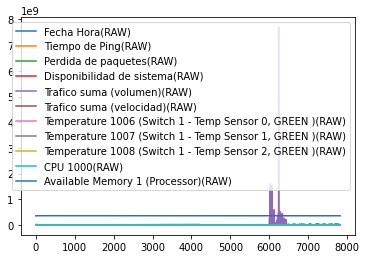

In [7]:
redes.plot()

In [8]:
data = redes.sample(frac=0.95, random_state=786)
data_unseen = redes.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (7432, 21)
Unseen Data For Predictions: (391, 21)


In [9]:
from pycaret.anomaly import *

exp_ano101 = setup(data, normalize = True, 
                   session_id = 123)

Description                 Value
0                               session_id                   123
1                            Original Data            (7432, 21)
2                           Missing Values                 False
3                         Numeric Features                    11
4                     Categorical Features                    10
5                         Ordinal Features                 False
6                High Cardinality Features                 False
7                  High Cardinality Method                  None
8                         Transformed Data         (7432, 10184)
9                                 CPU Jobs                    -1
10                                 Use GPU                 False
11                          Log Experiment                 False
12                         Experiment Name  anomaly-default-name
13                                     USI                  98ce
14                         Imputation Type                simple
15          Iterative Imputation Iteration                  None
16                         Numeric Imputer                  mean
17      Iterative Imputation Numeric Model                  None
18                     Categorical Imputer                  mode
19  Iterative Imputation Categorical Model                  None
20           Unknown Categoricals Handling        least_frequent
21                               Normalize                  True
22                        Normalize Method                zscore
23                          Transformation                 False
24                   Transformation Method                  None
25                                     PCA                 False
26                              PCA Method                  None
27                          PCA Components                  None
28                     Ignore Low Variance                 False
29                     Combine Rare Levels                 False
30                    Rare Level Threshold                  None
31                         Numeric Binning                 False
32                         Remove Outliers                 False
33                      Outliers Threshold                  None
34                Remove Multicollinearity                 False
35             Multicollinearity Threshold                  None
36                              Clustering                 False
37                    Clustering Iteration                  None
38                     Polynomial Features                 False
39                       Polynomial Degree                  None
40                    Trignometry Features                 False
41                    Polynomial Threshold                  None
42                          Group Features                 False
43                       Feature Selection                 False
44            Features Selection Threshold                  None
45                     Feature Interaction                 False
46                           Feature Ratio                 False
47                   Interaction Threshold                  None

In [10]:

iforest = create_model('iforest')
print(iforest)

IForest(behaviour='new', bootstrap=False, contamination=0.05,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
    random_state=123, verbose=0)


In [ ]:
#svm = create_model('svm', fraction = 0.025)
#print(svm)

IntProgress(value=0, description='Processing: ', max=3)

Initiated  . . . . . . . . . . . . . . . . . .                01:52:38
Status     . . . . . . . . . . . . . . . . . .  Fitting 0.025 Fraction
Estimator  . . . . . . . . . . . . . . . . . .  One-class SVM detector

In [ ]:
#svm_results = assign_model(svm)
# svm.head()

NameError: ignored

In [13]:
iforest_results = assign_model(iforest)
iforest_results.head()

Fecha Hora  Fecha Hora(RAW)  ... Anomaly  Anomaly_Score
0  22/08/2020 12:00:00 - 13:00:00      44065.75000  ...       0      -0.012273
1    21/05/2020 3:00:00 - 4:00:00      43972.37500  ...       0      -0.005489
2  02/08/2020 18:00:00 - 19:00:00      44046.00000  ...       0      -0.020823
3    18/09/2020 1:00:00 - 2:00:00      44092.29167  ...       0      -0.012563
4  20/10/2020 20:00:00 - 21:00:00      44125.08333  ...       0      -0.016966

[5 rows x 23 columns]

In [12]:
from pycaret.classification import *
clf1 = setup(data = iforest_results, target = 'Anomaly', ignore_features=['Anomaly_Score'])

Description             Value
0                               session_id              6559
1                                   Target           Anomaly
2                              Target Type            Binary
3                            Label Encoded        0: 0, 1: 1
4                            Original Data        (7432, 23)
5                           Missing Values             False
6                         Numeric Features                11
7                     Categorical Features                10
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set      (5202, 5684)
12                    Transformed Test Set      (2230, 5684)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              adbf
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize             False
30                        Normalize Method              None
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44                              Clustering             False
45                    Clustering Iteration              None
46                     Polynomial Features             False
47                       Polynomial Degree              None
48                    Trignometry Features             False
49                    Polynomial Threshold              None
50                          Group Features             False
51                       Feature Selection             False
52            Features Selection Threshold              None
53                     Feature Interaction             False
54                           Feature Ratio             False
55                   Interaction Threshold              None
56                           Fix Imbalance             False
57                    Fix Imbalance Method             SMOTE

In [12]:
dt=create_model('dt')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9655  0.7892  0.5926  0.6957  0.6400  0.6220  0.6242
1       0.9616  0.6997  0.4074  0.7333  0.5238  0.5055  0.5293
2       0.9615  0.7247  0.4615  0.6667  0.5455  0.5261  0.5358
3       0.9615  0.7976  0.6154  0.6154  0.6154  0.5951  0.5951
4       0.9692  0.7470  0.5000  0.8125  0.6190  0.6040  0.6234
5       0.9692  0.7287  0.4615  0.8571  0.6000  0.5855  0.6160
6       0.9558  0.7217  0.4615  0.5714  0.5106  0.4878  0.4908
7       0.9731  0.8036  0.6154  0.8000  0.6957  0.6818  0.6882
8       0.9596  0.7419  0.5000  0.6190  0.5532  0.5323  0.5356
9       0.9538  0.7481  0.5185  0.5600  0.5385  0.5142  0.5146
Mean    0.9631  0.7502  0.5134  0.6931  0.5842  0.5654  0.5753
SD      0.0058  0.0334  0.0684  0.0995  0.0562  0.0587  0.0596

In [14]:
pip install shap

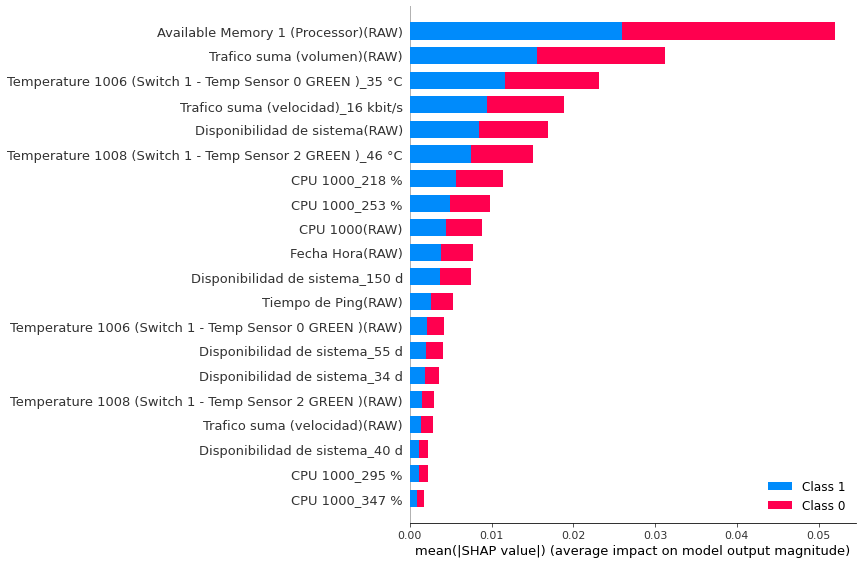

In [15]:
interpret_model(dt)

In [19]:
interpret_model(dt, plot = 'reason', observation = 10)

In [19]:

from pycaret.regression import *


reg1 = setup(data = iforest_results, target = 'Anomaly_Score', ignore_features=['Anomaly'])
lightgbm = create_model('lightgbm')



MAE  MSE    RMSE      R2   RMSLE    MAPE
0     0.0015  0.0  0.0019  0.8950  0.0018  0.3052
1     0.0016  0.0  0.0022  0.8686  0.0020  0.4622
2     0.0015  0.0  0.0020  0.8846  0.0020  1.5872
3     0.0015  0.0  0.0020  0.8925  0.0019  0.4798
4     0.0015  0.0  0.0020  0.8879  0.0018  0.3822
5     0.0015  0.0  0.0019  0.8856  0.0019  0.6254
6     0.0014  0.0  0.0018  0.9131  0.0017  0.5219
7     0.0015  0.0  0.0020  0.8834  0.0019  0.6476
8     0.0015  0.0  0.0020  0.9006  0.0019  0.5239
9     0.0015  0.0  0.0020  0.8926  0.0019  3.2899
Mean  0.0015  0.0  0.0020  0.8904  0.0019  0.8825
SD    0.0001  0.0  0.0001  0.0111  0.0001  0.8715

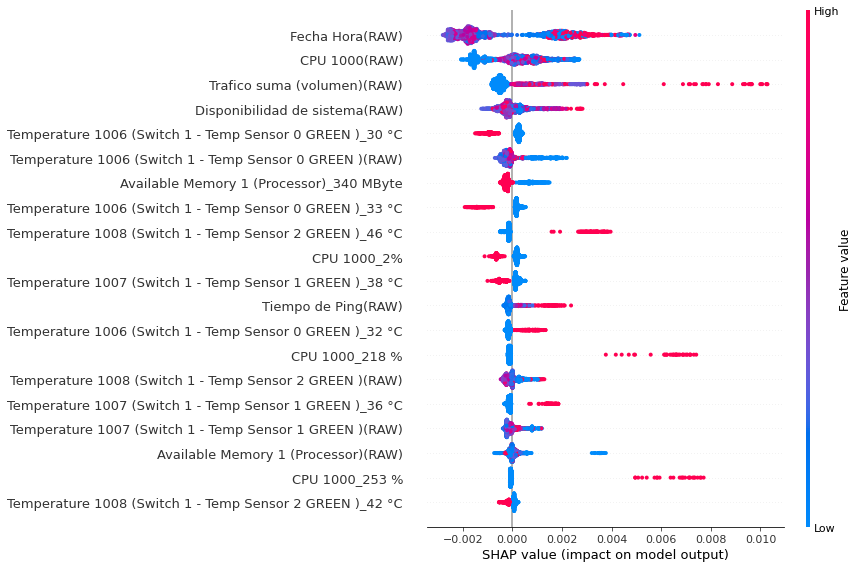

In [20]:
interpret_model(lightgbm)

In [22]:
evaluate_model(lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

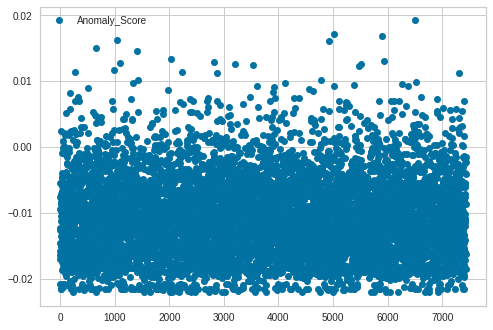

In [29]:
df=iforest_results[['Fecha Hora' ,'Anomaly_Score']]
df.plot(style=['o','rx'])

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

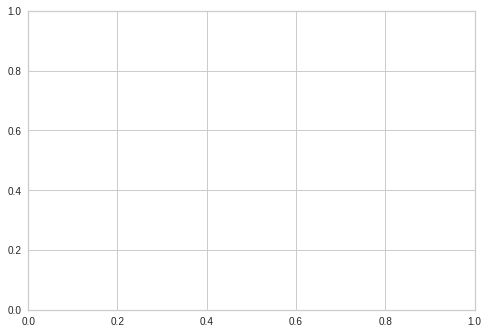

In [20]:
evaluate_model(dt)

In [ ]:
#best = compare_models(dt)

IntProgress(value=0, description='Processing: ', max=79)

Initiated  . . . . . . . . . . . . . . . . . .                      16:55:32
Status     . . . . . . . . . . . . . . . . . .              Fitting 10 Folds
Estimator  . . . . . . . . . . . . . . . . . .  Linear Discriminant Analysis

Model  Accuracy     AUC  Recall   Prec.      F1  \
dt     Decision Tree Classifier    0.9996  0.9979  0.9960  0.9962  0.9960   
rf     Random Forest Classifier    0.9862  0.9996  0.7132  1.0000  0.8305   
knn      K Neighbors Classifier    0.9581  0.8295  0.3149  0.6516  0.4187   
nb                  Naive Bayes    0.9531  0.7461  0.0868  0.5863  0.1362   
lr          Logistic Regression    0.9519  0.6731  0.0195  0.2100  0.0345   
ridge          Ridge Classifier    0.9519  0.0000  0.0078  0.1500  0.0148   
svm         SVM - Linear Kernel    0.9517  0.0000  0.0000  0.0000  0.0000   

        Kappa     MCC  TT (Sec)  
dt     0.9958  0.9958     0.288  
rf     0.8235  0.8374     3.584  
knn    0.3998  0.4311     4.470  
nb     0.1276  0.1924     0.524  
lr     0.0318  0.0565     3.334  
ridge  0.0138  0.0324    28.847  
svm    0.0000  0.0000     2.487

In [ ]:
plot_model(iforest)

In [31]:
iforest_results.sort_values('Anomaly_Score', ascending=False)


Fecha Hora  Fecha Hora(RAW)  ... Anomaly  Anomaly_Score
6496    06/11/2020 2:00:00 - 3:00:00      44141.33333  ...       1       0.019199
5026  05/11/2020 15:00:00 - 16:00:00      44140.87500  ...       1       0.017140
5889   04/11/2020 9:00:00 - 10:00:00      44139.62500  ...       1       0.016886
1035  06/11/2020 13:00:00 - 14:00:00      44141.79167  ...       1       0.016274
4932  06/11/2020 15:00:00 - 16:00:00      44141.87500  ...       1       0.016143
...                              ...              ...  ...     ...            ...
1642  04/06/2020 11:00:00 - 12:00:00      43986.70833  ...       0      -0.022034
5745  04/06/2020 10:00:00 - 11:00:00      43986.66667  ...       0      -0.022034
6046   27/09/2020 9:00:00 - 10:00:00      44101.62500  ...       0      -0.022034
3768    27/09/2020 4:00:00 - 5:00:00      44101.41667  ...       0      -0.022034
2017  29/09/2020 22:00:00 - 23:00:00      44104.16667  ...       0      -0.022034

[7432 rows x 23 columns]

In [39]:
iforest_results.to_excel('Name.xlsx', index = False)
!ls
%dirs /"TS"

logs.log  Name.xlsx  sample_data


[]

In [ ]:
# load the car sales dataset
from pandas import read_excel
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
from statsmodels.graphics.gofplots import qqplot
from fbprophet import Prophet
from pandas import to_datetime

Fecha Hora(RAW)  ...  Anomaly_Score
Fecha Hora(RAW)                                            1.000000  ...       0.130353
Tiempo de Ping(RAW)                                       -0.070410  ...       0.076466
Perdida de paquetes(RAW)                                  -0.075719  ...      -0.007527
Disponibilidad de sistema(RAW)                            -0.137522  ...      -0.226872
Trafico suma (volumen)(RAW)                                0.098231  ...       0.147020
Trafico suma (velocidad)(RAW)                              0.098495  ...       0.147242
Temperature 1006 (Switch 1 - Temp Sensor 0, GRE...         0.041873  ...       0.224006
Temperature 1007 (Switch 1 - Temp Sensor 1, GRE...         0.073981  ...       0.235624
Temperature 1008 (Switch 1 - Temp Sensor 2, GRE...         0.063045  ...       0.243996
CPU 1000(RAW)                                              0.457781  ...       0.229959
Available Memory 1 (Processor)(RAW)                        0.060307  ...       0.194520
Anomaly                                                    0.069871  ...       0.545210
Anomaly_Score                                              0.130353  ...       1.000000

[13 rows x 13 columns]

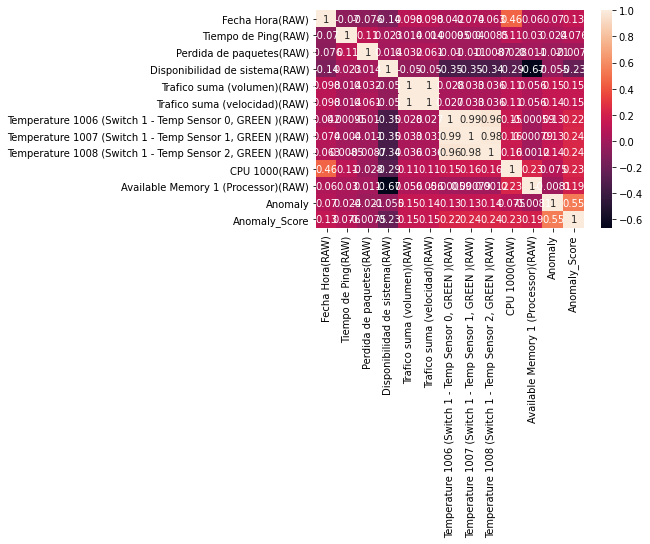

In [ ]:
corrMatrix = iforest_results.corr()
sns.heatmap(corrMatrix, annot=True)
corrMatrix

0.0
H1  La muestra no sigue una distribución normal
stat=-57.673, p=0.000
Probably Stationary


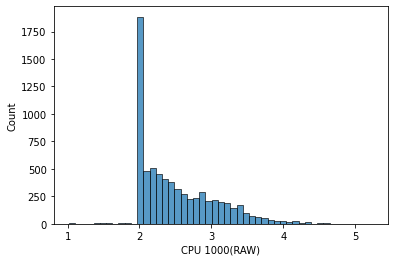

In [ ]:
#@title Texto de título predeterminado { run: "auto", vertical-output: true }
fila = "CPU 1000(RAW)" #@param ["CPU 1000(RAW)", "Tiempo de Ping(RAW)"]
anomalia = "0" #@param ["1", "0"]
a = iforest_results.loc[(iforest_results.Anomaly==int(anomalia))] 
sns.histplot(a[fila])
stat, p = stats.shapiro(a[fila])
# interpret
print(p)
alpha = 0.05
if p > alpha:
	print('0 La muestra sigue una distribución normal')
else:
	print('H1  La muestra no sigue una distribución normal')
# Example of the Augmented Dickey-Fuller unit root test
from statsmodels.tsa.stattools import adfuller
stat, p, lags, obs, crit, t = adfuller(a[fila])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably not Stationary')
else:
	print('Probably Stationary')


In [30]:
unseen_predictions = predict_model(iforest, data=data_unseen)
unseen_predictions.head()



ValueError: ignored